In [2]:
pip install mysql-connector-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


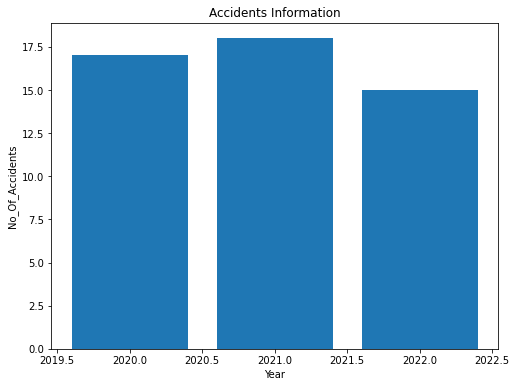

In [18]:
# Connecting to mysql database
import mysql.connector
import numpy as np
import matplotlib.pyplot as plt
 
mydb = mysql.connector.connect(host="localhost",
                               user="root",
                               password="root",
                               database="db_insurance")
mycursor = mydb.cursor()
 
# Fecthing Data From mysql to my python progamme
mycursor.execute("select year(date),count(accident_id) from accident group by year(date);")
result = mycursor.fetchall
 
Year = []
No_Of_Accidents = []
 
for i in mycursor:
    Year.append(i[0])
    No_Of_Accidents.append(i[1])
 
# Visulizing Data using Matplotlib
plt.figure(figsize=(8, 6))
plt.bar(Year, No_Of_Accidents)
plt.xlabel("Year")
plt.ylabel("No_Of_Accidents")
plt.title("Accidents Information")
plt.show()

In [38]:
import mysql.connector as connection
import pandas as pd
try:
    mydb = connection.connect(host="localhost", database = 'db_insurance',user="root", passwd="root",use_pure=True)
    query = "select year(c.date) as Year, count(c.claim_id) as Claim, count(s.settlement_id) as Settlement from claim c left join settlement s on  c.settlement_id = s.settlement_id group by year(c.date) order by year(c.date); ;"
    result_df = pd.read_sql(query,mydb)
    mydb.close() #close the connection
except Exception as e:
    mydb.close()
    print(str(e))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [39]:
result_df.set_index("Year", inplace = True)

In [40]:
result_df

,Claim,Settlement
Year,,
2019,2,0
2020,14,13
2021,17,17
2022,17,13


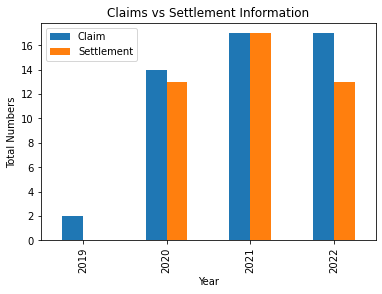

In [43]:
result_df.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Total Numbers")
plt.title("Claims vs Settlement Information")
plt.show()

In [56]:
import mysql.connector as connection
import pandas as pd
try:
    mydb = connection.connect(host="localhost", database = 'db_insurance',user="root", passwd="root",use_pure=True)
    query = "select p.gender, count(person_id) as count from person p, driver d where p.person_id = d.driver_id group by p.gender;"
    result_df = pd.read_sql(query,mydb)
    mydb.close() #close the connection
except Exception as e:
    mydb.close()
    print(str(e))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [57]:
#result_df.set_index("gender", inplace = True)
result_df

,gender,count
0,Female,14
1,Male,11


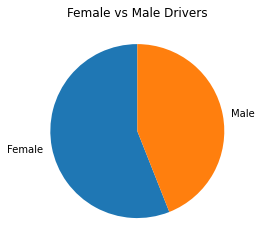

In [61]:
plt.pie(result_df['count'], labels = result_df['gender'], startangle = 90)
plt.title("Female vs Male Drivers")
plt.show() 

In [63]:
import mysql.connector as connection
import pandas as pd
try:
    mydb = connection.connect(host="localhost", database = 'db_insurance',user="root", passwd="root",use_pure=True)
    query = "SELECT STATE, COUNT(REGISTRATION_NO) AS NUMBER_OF_VEHICLES FROM VEHICLE GROUP BY STATE ORDER BY COUNT(REGISTRATION_NO) DESC LIMIT 10;"
    result_df = pd.read_sql(query,mydb)
    mydb.close() #close the connection
except Exception as e:
    mydb.close()
    print(str(e))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [67]:
result_df.set_index("STATE", inplace = True)
result_df

,NUMBER_OF_VEHICLES
STATE,
Florida,6
Illinois,4
New York,4
California,3
Ohio,3
Michigan,3
Colorado,3
North Carolina,3
Alabama,2


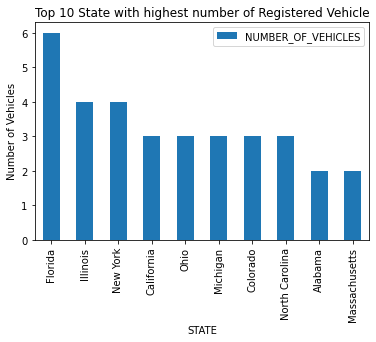

In [68]:
result_df.plot(kind="bar")
plt.xlabel("STATE")
plt.ylabel("Number of Vehicles")
plt.title("Top 10 State with highest number of Registered Vehicle")
plt.show()